-------------------------------------
# **Exploratory Data Analysis: Hotel Data Analysis**
-------------------------------------

--------------------
## **Context**
--------------------

Analyzing data is crucial for optimizing the revenue of a hotel as it provides valuable insights into customer behavior, market trends, and the effectiveness of different marketing strategies. By analyzing data such as customer demographics, booking patterns, and spending habits, hotel managers can tailor their services to meet the needs and preferences of their target audience, resulting in increased customer satisfaction and loyalty. Additionally, data analysis can help identify peak periods of demand and adjust pricing accordingly, allowing hotels to maximize revenue and profitability. In a highly competitive industry such as hospitality, leveraging data insights can make the difference between success and failure.

------------------
## **Objective**
------------------

To extract actionable insights around Average daily rate of the booking patterns across various factors.

-----------------------------
## **Key Questions**
-----------------------------

1. what variables affect the hotel reservation price? ?
2. Which factor affects the hotel reservation price the most? What could be plausible reasons for that?
3. What recommendations to the hotel management to increase revenues?

------------------------------------
## **Dataset Description**
------------------------------------

Hotel customer dataset with 10 variables. It comprehends three full years of customer behavioral data. In addition to personal and behavioral information, the dataset also contains demographic and geographical information. The data set was obtained (and modified) from: https://data.mendeley.com/datasets/j83f5fsh6c/1

* hotel: One of "Resort Hotel" or "City Hotel"
* reservation_lead_time: Number of days the reservation was placed in advance of the scheduled arrival
* Date: Date of scheduled arrival as MM/DD/YYYY
* stays_in_days: Total number of booked nights
* adults: Number of adults included in the booking*
* children: Number of children and babies included in the booking
* Nationality: Nationality of guest (DEU = Germany, ESP = Spain, FRA = France, ITA = Italy, PRT = Portugal, USA = US, Other)
* booking_origin: Indicates channel through which the booking was made
* reserved_room_type: Count of previous bookings not canceled by the guest
* adr: Average daily rate of the booking (in Euros)


##  **Importing the necessary libraries and overview of the dataset**

In [62]:
# Library to suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [63]:
# Libraries to help with reading and manipulating data

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Libraries to help with data visualization

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

### **Loading the dataset**

In [64]:
data = pd.read_excel('Bookings-sample.xlsx')

In [65]:
# Copying data to another variable to avoid any changes to the original data
df = data.copy()

### **View the first 5 rows of the dataset**

In [66]:
# Looking at head (the first 5 observations) 
df.head()

,hotel,reservation_lead_time,Date,stays_in_days,adults,children,Nationality,booking_origin,reserved_room_type,adr
0,Resort Hotel,737,2015-07-01,0,2,0,PRT,Direct,C,0.0
1,Resort Hotel,13,2015-07-01,1,1,0,GBR,Corporate,A,75.0
2,Resort Hotel,14,2015-07-01,2,2,0,GBR,Online TA,A,98.0
3,Resort Hotel,75,2015-07-01,3,2,0,PRT,Offline TA/TO,D,105.5
4,Resort Hotel,23,2015-07-01,4,2,0,PRT,Online TA,E,123.0


**Observations:**

* The column Data shows that the data starts from 01-Jul-2015.

### **View the last 5 rows of the dataset**

In [67]:
# Looking at tail (the last 5 observations) 
df.tail()

,hotel,reservation_lead_time,Date,stays_in_days,adults,children,Nationality,booking_origin,reserved_room_type,adr
29841,City Hotel,175,2017-08-31,4,1,0,Other,Offline TA/TO,A,82.35
29842,City Hotel,201,2017-08-29,6,2,0,DEU,Online TA,A,117.00
29843,City Hotel,135,2017-08-30,6,3,0,Other,Online TA,G,209.00
29844,City Hotel,109,2017-08-31,7,2,0,GBR,Online TA,A,104.40
29845,City Hotel,205,2017-08-29,9,2,0,DEU,Online TA,A,151.20


**Observations:**

* The head indicated that the data began on July 1, 2015, whereas the tail indicates that it continued until Aug 29, 2017. This means we have **six months' worth of data to analyze**.

### **Checking the shape of the dataset**

In [68]:
df.shape

(29846, 10)

* The dataset has **29,846 rows and 10 columns**.

### **Checking the info()**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29846 entries, 0 to 29845
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   hotel                  29846 non-null  object        
 1   reservation_lead_time  29846 non-null  int64         
 2   Date                   29846 non-null  datetime64[ns]
 3   stays_in_days          29846 non-null  int64         
 4   adults                 29846 non-null  int64         
 5   children               29846 non-null  int64         
 6   Nationality            29846 non-null  object        
 7   booking_origin         29846 non-null  object        
 8   reserved_room_type     29846 non-null  object        
 9   adr                    29846 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.3+ MB


**Observations:**

* All columns have 29846 observations.Indicating that there are not null values in it.

### **Summary of the data**

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reservation_lead_time,29846.0,104.037794,106.892122,0.0,17.000,69.0,161.0,737.0
stays_in_days,29846.0,3.423909,2.569292,0.0,2.000,3.0,4.0,48.0
adults,29846.0,1.851538,0.512506,0.0,2.000,2.0,2.0,26.0
children,29846.0,0.100885,0.392134,0.0,0.000,0.0,0.0,3.0
adr,29846.0,101.614885,48.075604,0.0,69.065,94.5,126.0,510.0


* There is a significant discrepancy between the third quartile and the highest value for the reservation lead, indicating that these variables may have outliers to the right.


**By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [71]:
df.describe(exclude = 'number').T

,count,unique,top,freq,first,last
hotel,29846,2,City Hotel,19877,NaT,NaT
Date,29846,793,2015-12-05 00:00:00,116,2015-07-01,2017-08-31
Nationality,29846,8,PRT,12121,NaT,NaT
booking_origin,29846,7,Online TA,14015,NaT,NaT
reserved_room_type,29846,8,A,21419,NaT,NaT


**Observations:**

* The variable 'borough' has six unique categories. The category Bronx has occurred 4,343 times in the data.
* The variable 'hday' has 2 unique categories. The category N, i.e., not a holiday as occurred more often, which makes sense.

**Let's check the count of each unique category in each of the categorical variables.**

In [72]:
# Making a list of all categorical variables 
cat_col = ['Nationality', 'booking_origin','hotel','reserved_room_type']

# Printing number of count of each unique value in each column

for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

PRT      12121
Other     6592
GBR       3008
FRA       2610
ESP       2176
DEU       1806
ITA        973
USA        560
Name: Nationality, dtype: int64
--------------------------------------------------
Online TA        14015
Offline TA/TO     6097
Groups            4994
Direct            3154
Corporate         1332
Complementary      192
Aviation            62
Name: booking_origin, dtype: int64
--------------------------------------------------
City Hotel      19877
Resort Hotel     9969
Name: hotel, dtype: int64
--------------------------------------------------
A    21419
D     4811
E     1659
F      740
G      530
B      300
C      227
H      160
Name: reserved_room_type, dtype: int64
--------------------------------------------------


### **Extracting date parts from pickup date**

In [73]:
# Converting pickup_dt datatype to datetime 

df.pickup_dt = pd.to_datetime(df.Date)

# Extracting date parts from pickup_dt

df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()

In [74]:
# Removing pickup_dt column as it will not be required for further analysis

df.drop('Date', axis = 1, inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29846 entries, 0 to 29845
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hotel                  29846 non-null  object 
 1   reservation_lead_time  29846 non-null  int64  
 2   stays_in_days          29846 non-null  int64  
 3   adults                 29846 non-null  int64  
 4   children               29846 non-null  int64  
 5   Nationality            29846 non-null  object 
 6   booking_origin         29846 non-null  object 
 7   reserved_room_type     29846 non-null  object 
 8   adr                    29846 non-null  float64
 9   start_year             29846 non-null  int64  
 10  start_month            29846 non-null  object 
 11  start_day              29846 non-null  int64  
 12  week_day               29846 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.0+ MB


### **Missing value treatment**

In [76]:
# Checking missing values

df.isna().sum()

hotel                    0
reservation_lead_time    0
stays_in_days            0
adults                   0
children                 0
Nationality              0
booking_origin           0
reserved_room_type       0
adr                      0
start_year               0
start_month              0
start_day                0
week_day                 0
dtype: int64


* The variables have no missing values.

## **Exploratory Data Analysis: Univariate**

**Let us explore the numerical variables first.**

In [77]:
# While doing a univariate analysis of numerical variables, we want to study their central tendency and dispersion

# Let us write a function that will help us create a boxplot and histogram for any numerical variable

# This function takes the numerical variable as the input and returns the boxplots and histograms for that variable

# This would help us write faster and cleaner code

def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # Creating the subplots
    
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

### **Observations on reservation lead time**

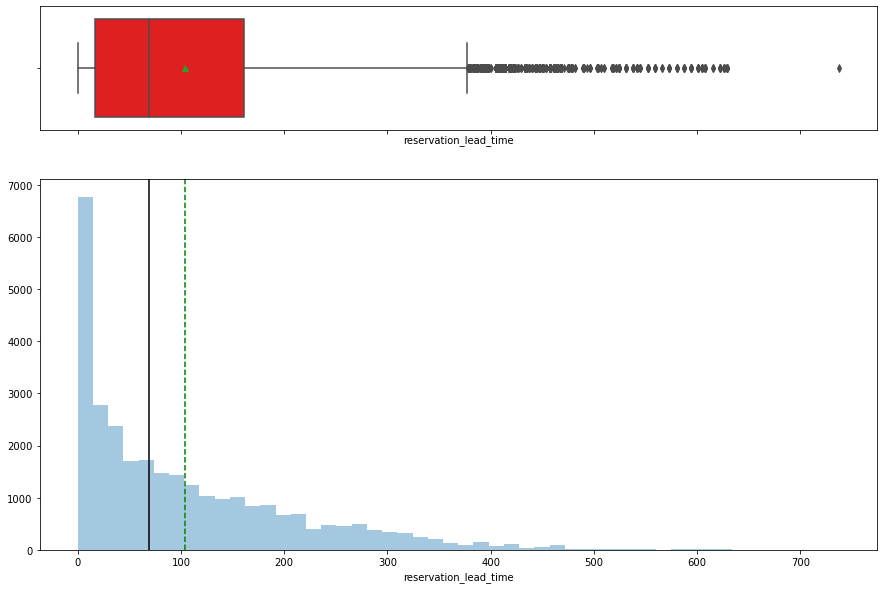

In [78]:
histogram_boxplot(df.reservation_lead_time)

**Observations:**
* The distribution is highly right-skewed.
* The majority of the values are close to 0.
* Median values are equal to 80 days, but the mean is ~100 days.
* There are a lot of outliers in this variable.

###  **Observations on stays in days**

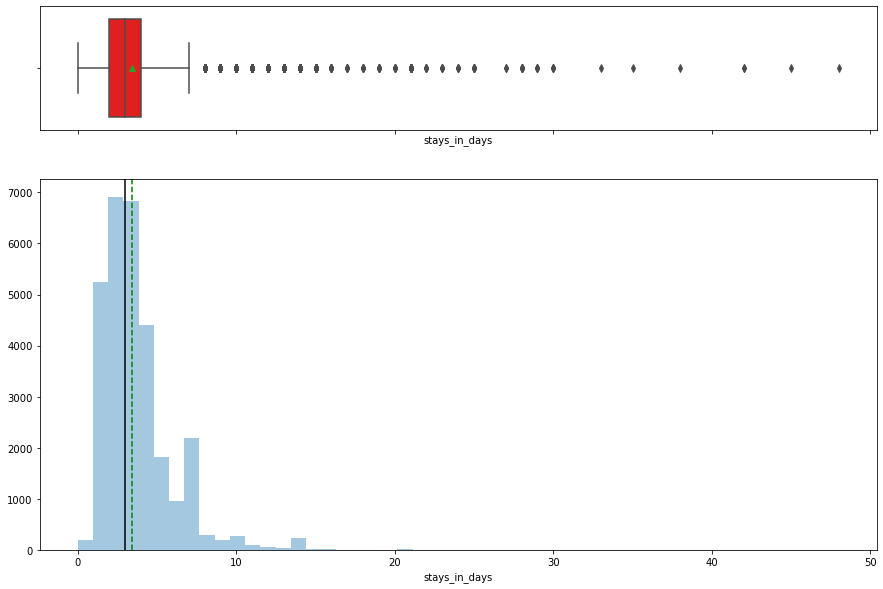

In [80]:
histogram_boxplot(df.stays_in_days)

**Observations:**
* Median and the mean are ~4 days.
* There are a lot of outliers in this variable.

### **Observations on number of adults**

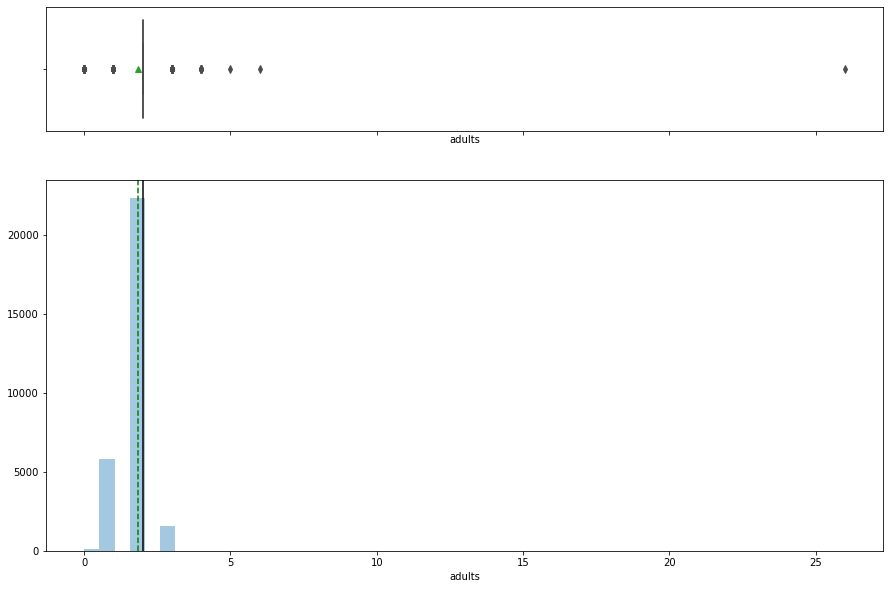

In [81]:
histogram_boxplot(df.adults)

**Observations:**
* Median and the mean are ~2 adults.
* There are a some outliers in this variable.

### **Observations on number of children**

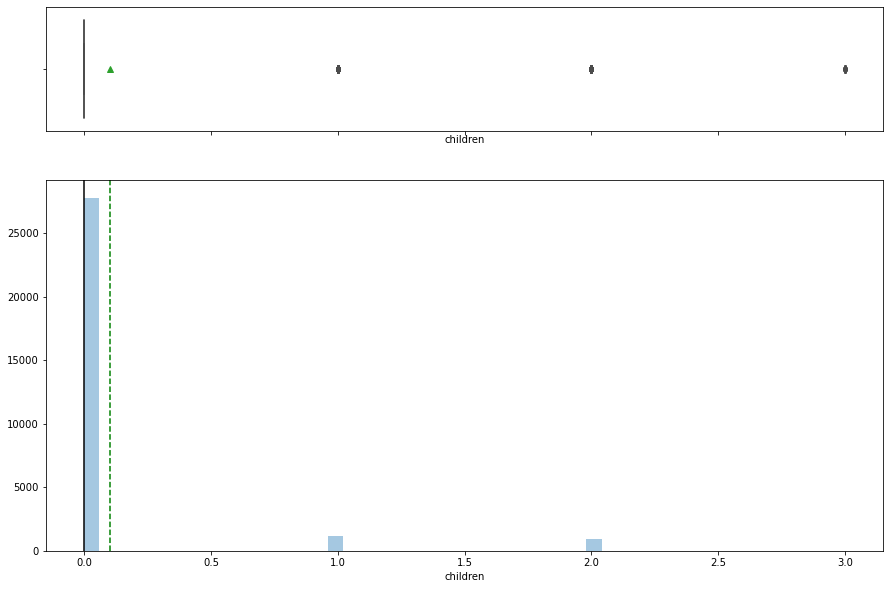

In [86]:
histogram_boxplot(df.children)

**Observations:**
* Median and the mean are ~1 children.

### **Observations on Average daily rate of the booking**

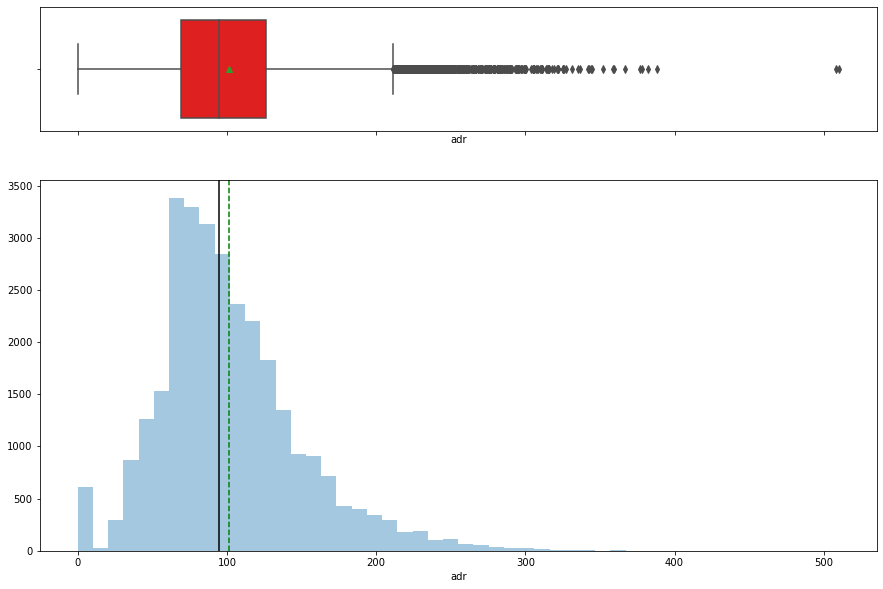

In [85]:
histogram_boxplot(df.adr)

**Observations:**
* The distribution looks approximately normal.
* There are a lot outliers on the right end.
* Median and the mean are ~100 Euros.
* There are a some outliers in this variable.

**Now, let's explore the categorical variables.**

In [87]:
# Function to create barplots that indicates percentage for each category

def bar_perc(data, z):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

### **Observations on holiday**

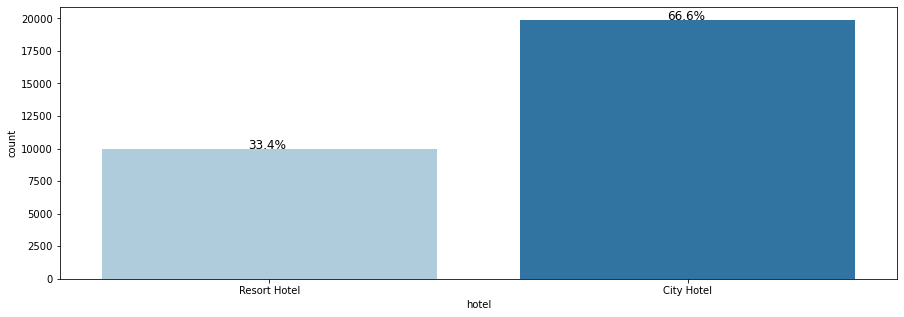

In [88]:
bar_perc(df, 'hotel')

**Observation:**

* 66% of reservations are for the city hotel.

### **Observations on Nationality**

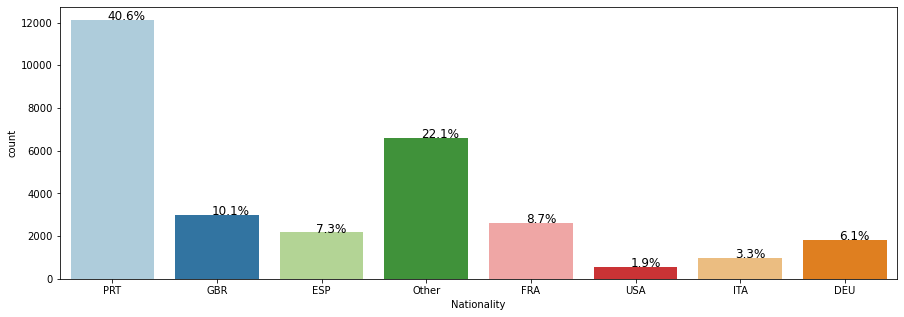

In [89]:
bar_perc(df, 'Nationality')

**Observation:**

* The majority of costumers are from Portugal.

### **Observations on Booking origin**

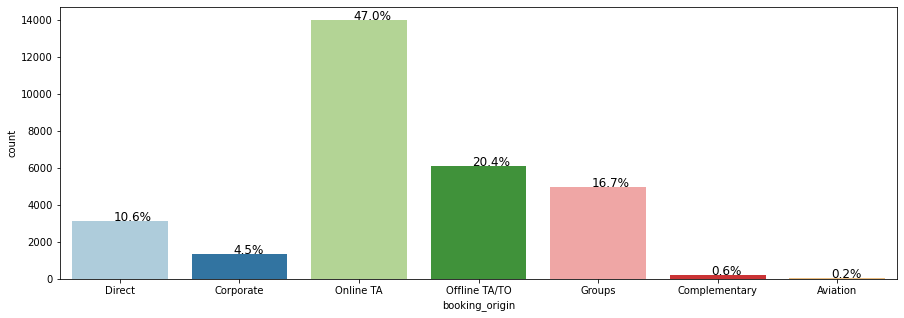

In [94]:
bar_perc(df, 'booking_origin')

**Observation:**

* The majority of costumers are from the Online TA portal.

### **Observations on the reserved room type**

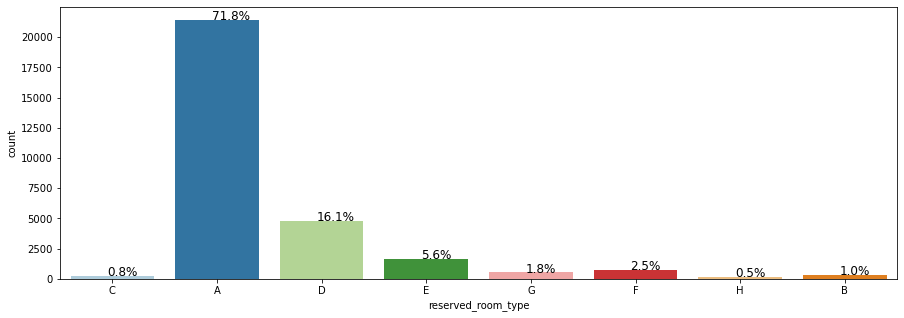

In [95]:
bar_perc(df, 'reserved_room_type')

**Observation:**

* The majority of reservations are for A type room.

## **Exploratory Data Analysis: Multivariate**

**Let's plot multivariate charts between variables to understand their interaction with each other.**

### Correlation

<AxesSubplot:>

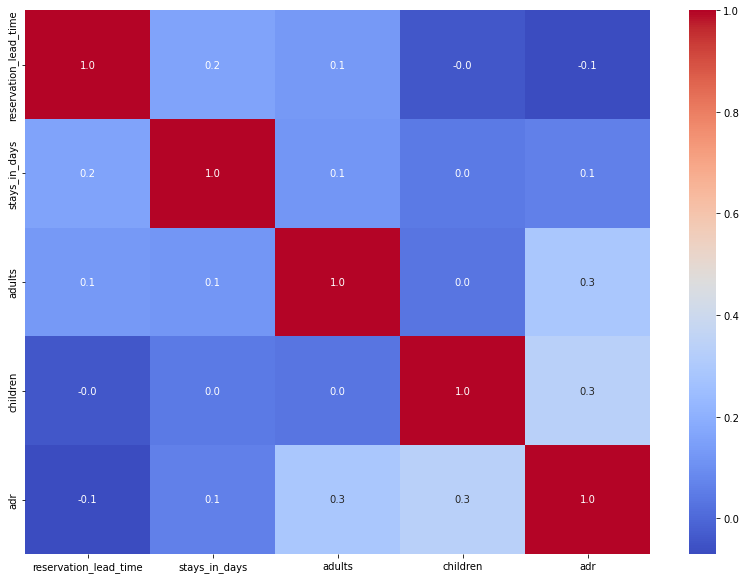

In [96]:
# Check for correlation among numerical variables

num_var = ['reservation_lead_time', 'stays_in_days', 'adults', 'children','adr']

corr = df[num_var].corr()

# Plot the heatmap

plt.figure(figsize = (14, 10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            
        fmt = ".1f",
            
        xticklabels = corr.columns,
            
        yticklabels = corr.columns)

**Observations:**

* As expected, the number of people shows a moderate correlation with the Average daily rate of the booking.

### **Pair Plot**

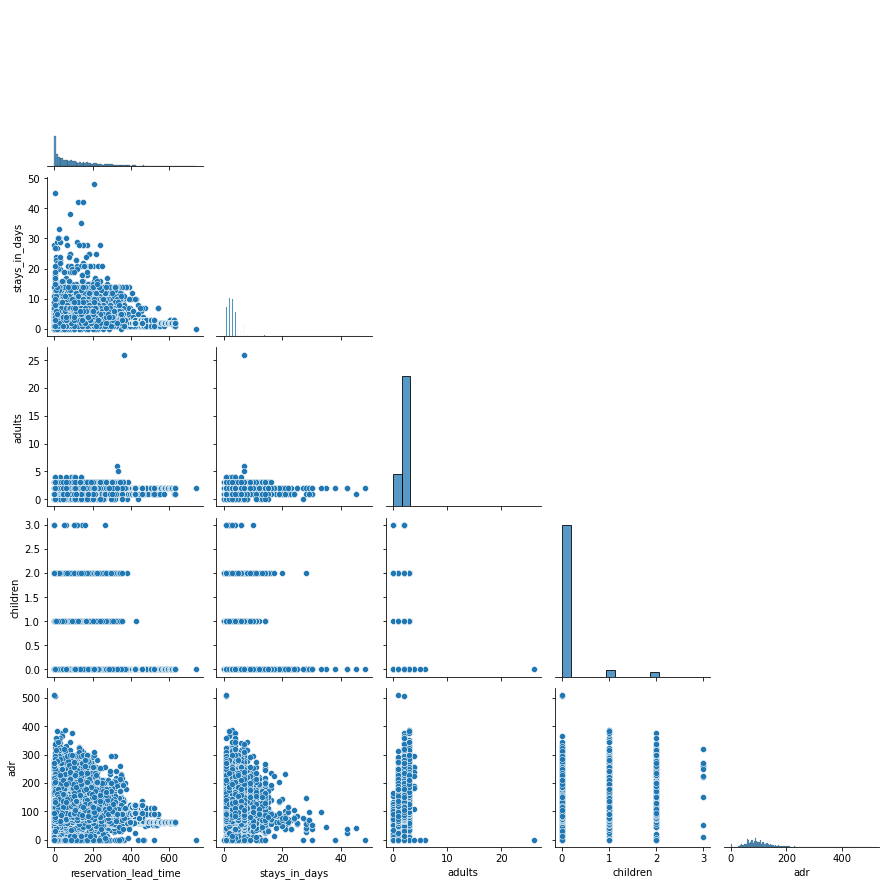

In [97]:
sns.pairplot(df[num_var], corner = True)

plt.show()

**Observations:**

* The correlation plot provides the same insights.


### **Relationship between Average daily rate of the booking and time based variables**

### **Average daily rate of the booking across Months**

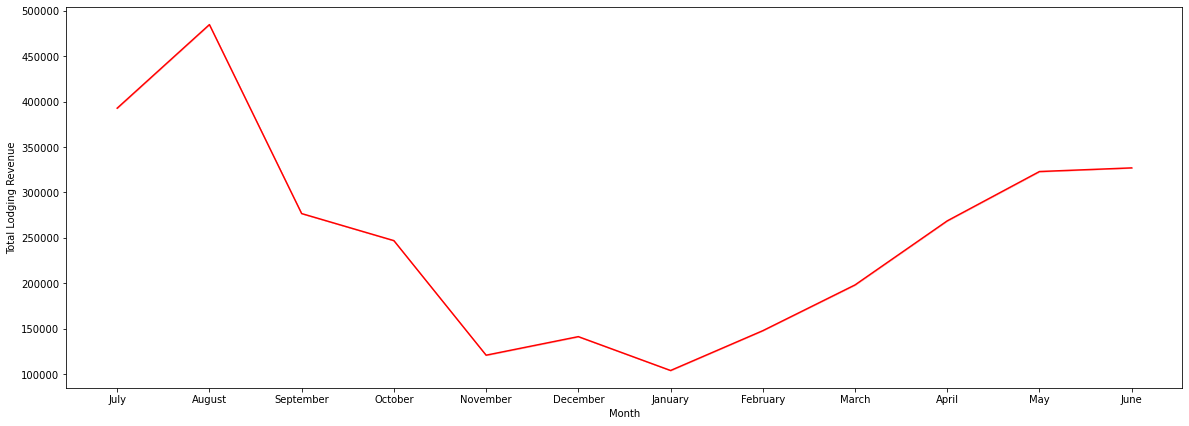

In [98]:
cats = df.start_month.unique().tolist()

df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)

plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_month", y = "adr", data = df, ci = 0, color = "RED", estimator = 'sum')

plt.ylabel('Total Lodging Revenue')

plt.xlabel('Month')

plt.show()

**Observations:**
* There is a clear increasing in the Average daily rate of the booking during June-September. 
* August is the month with the higher price.

### **Average daily rate of the booking vs Days of the Month**

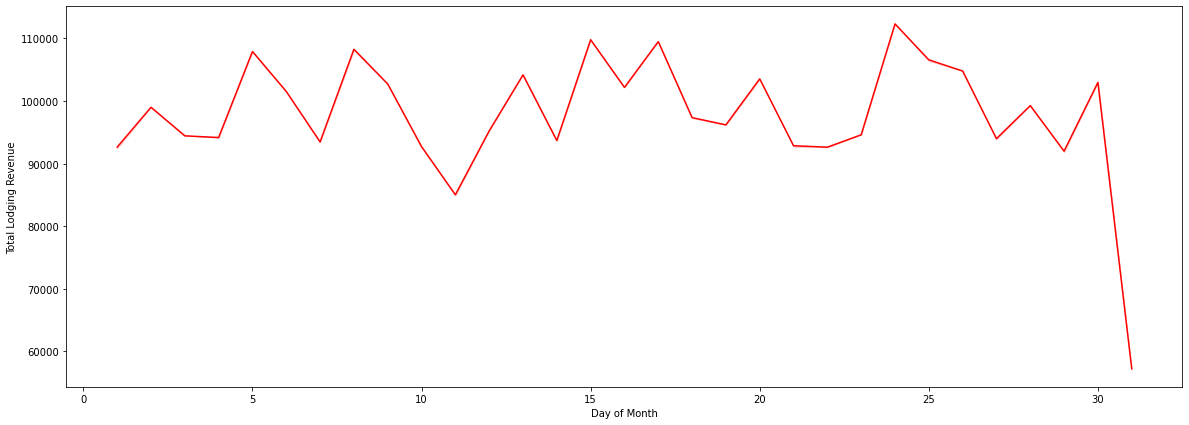

In [99]:
plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_day", y = "adr", estimator = 'sum', ci = 0, data = df, color = "RED")


plt.ylabel('Total Lodging Revenue')

plt.xlabel('Day of Month')

plt.show()

**Observations:**
* There is a steep fall in the values on the last day of the month.
* This can partially be attributed to Feb having just 28 days. We can drop Feb and have a look at this chart again.

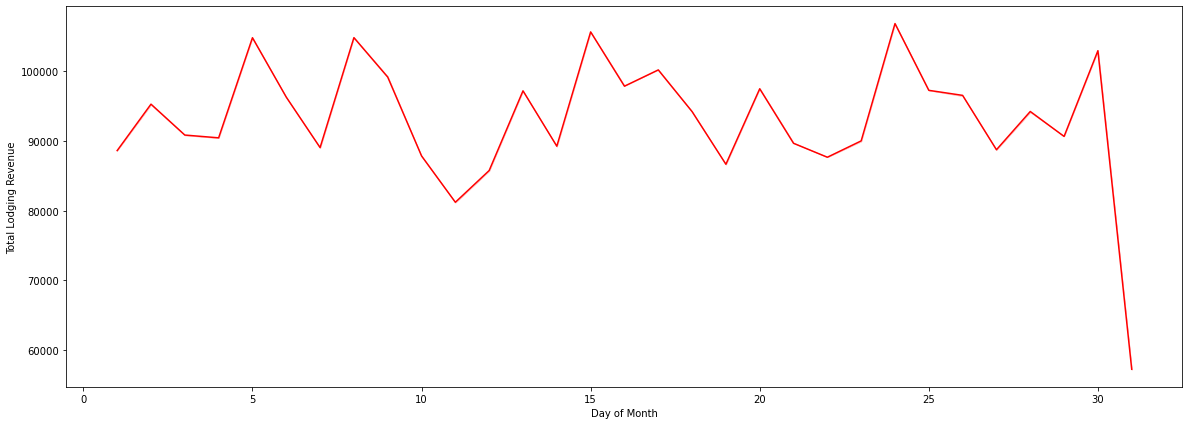

In [100]:
# Let's drop the Feb month and visualize again

df_not_feb =  df[df['start_month'] != 'February']

plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_day", y = "adr", estimator = 'sum', ci = 0, data = df_not_feb, color = "RED")

plt.ylabel('Total Lodging Revenue')

plt.xlabel('Day of Month')

plt.show()

**Observations:**

* Values for 31 is still low because not all months have the 31st day.

### **Average daily rate of the booking across Weekdays**

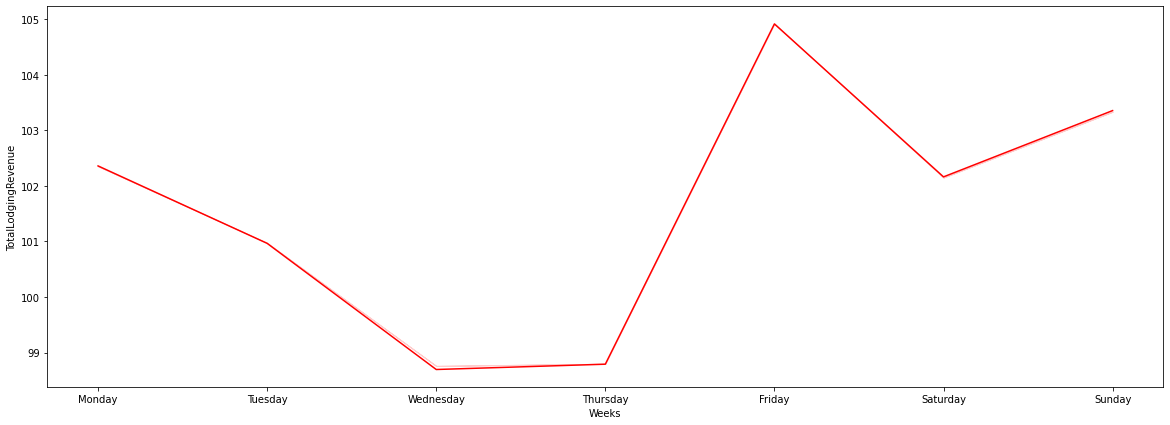

In [102]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)

plt.figure(figsize = (20, 7))

sns.lineplot(x = "week_day", y = "adr", ci = 0, data = df, color = "RED")

plt.ylabel('TotalLodgingRevenue')

plt.xlabel('Weeks')

plt.show()

**Observations:**
* Friday is the day with the higher price
* Wednesday and Thursday are the day with the higher price

### **Average daily rate of the booking across Hotel**

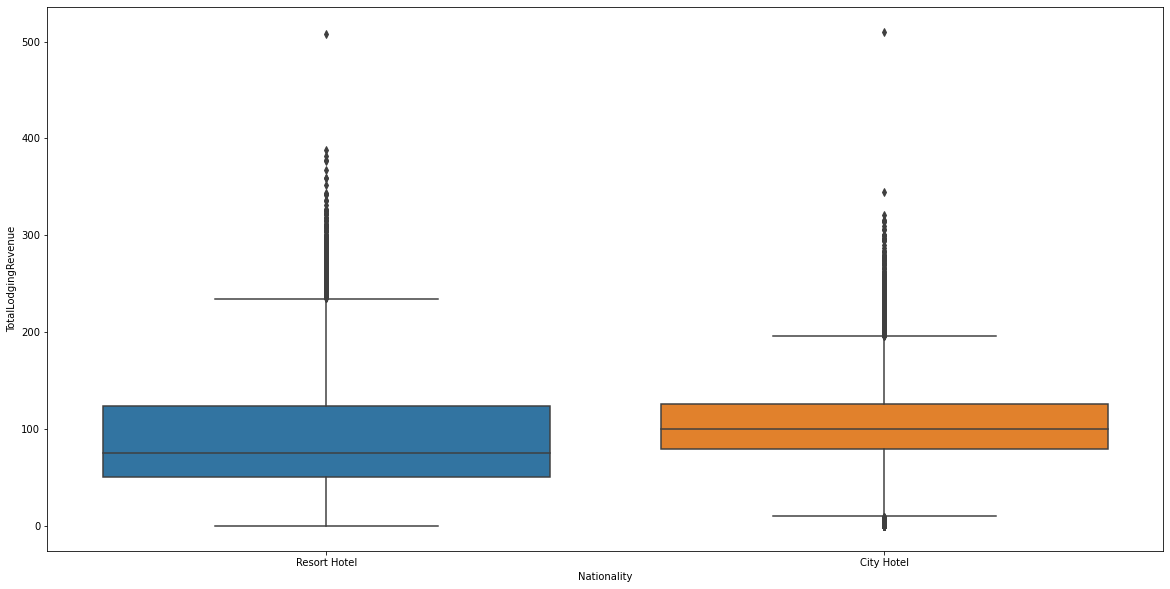

In [103]:
plt.figure(figsize = (20, 10))  

sns.boxplot(df['hotel'], df['adr'])

plt.ylabel('TotalLodgingRevenue')

plt.xlabel('Nationality')

plt.show()

**Observations:**
* The values of the Average daily rate of the booking are, in general, similar.

### **Average daily rate of the booking across Nationality*

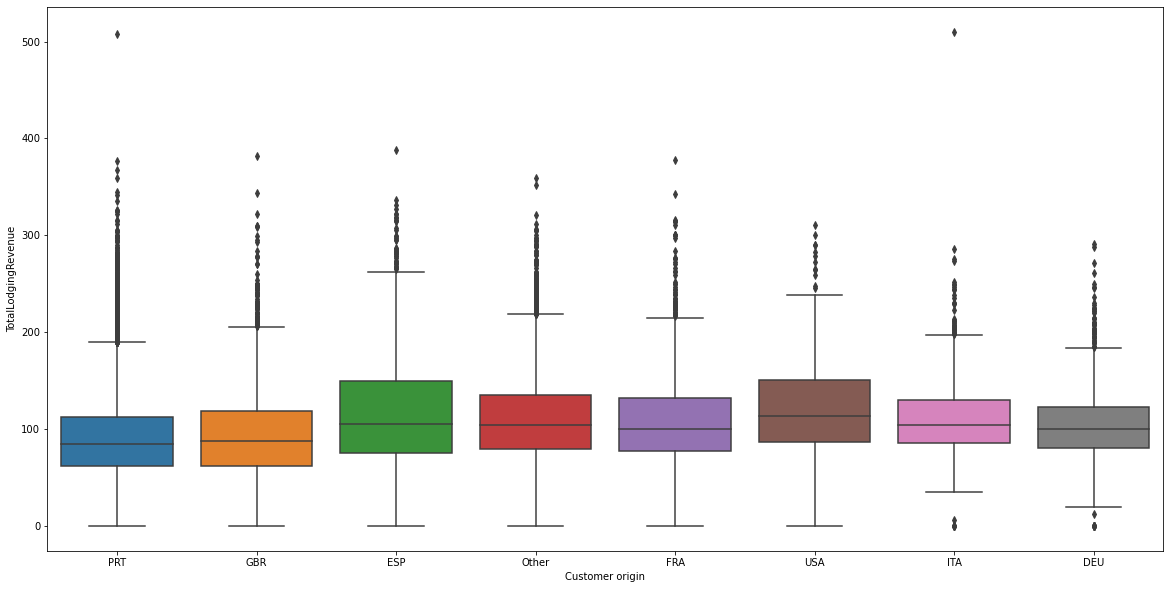

In [104]:
plt.figure(figsize = (20, 10))  

sns.boxplot(df['Nationality'], df['adr'])

plt.ylabel('TotalLodgingRevenue')

plt.xlabel('Customer origin')

plt.show()

**Observations:**
* Spain and USA have the higher price in the Average daily rate of the booking.

## **Average daily rate of the booking across Booking origin*

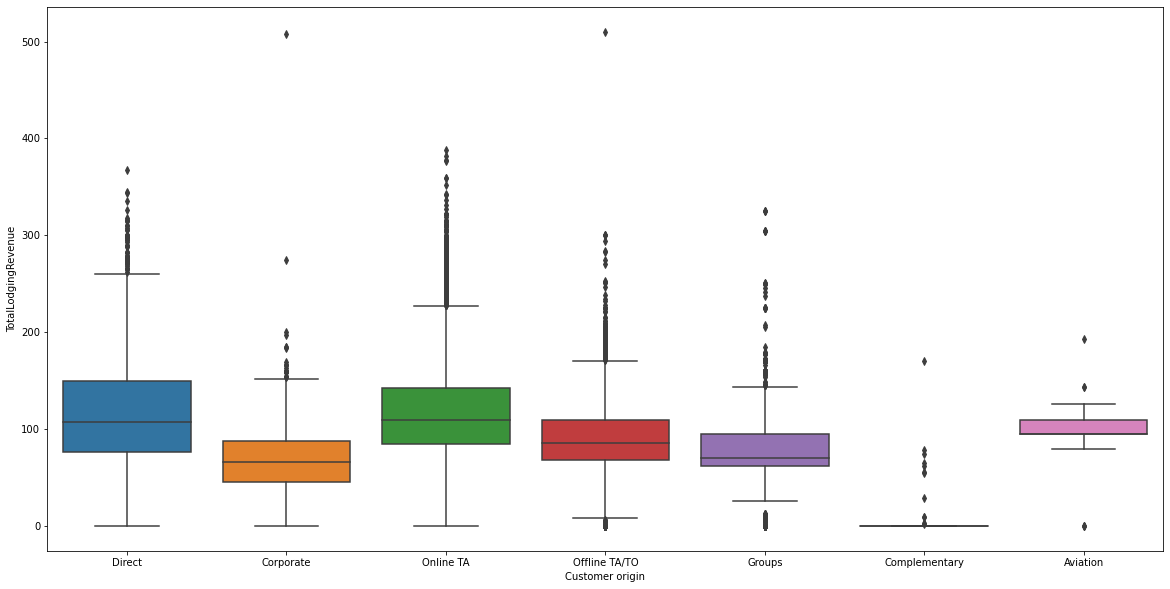

In [106]:
plt.figure(figsize = (20, 10))  

sns.boxplot(df['booking_origin'], df['adr'])

plt.ylabel('TotalLodgingRevenue')

plt.xlabel('Customer origin')

plt.show()

**Observations:**
* Direct and Online TA have the higher price in the Average daily rate of the booking.

## **Average daily rate of the booking across reserved room types**

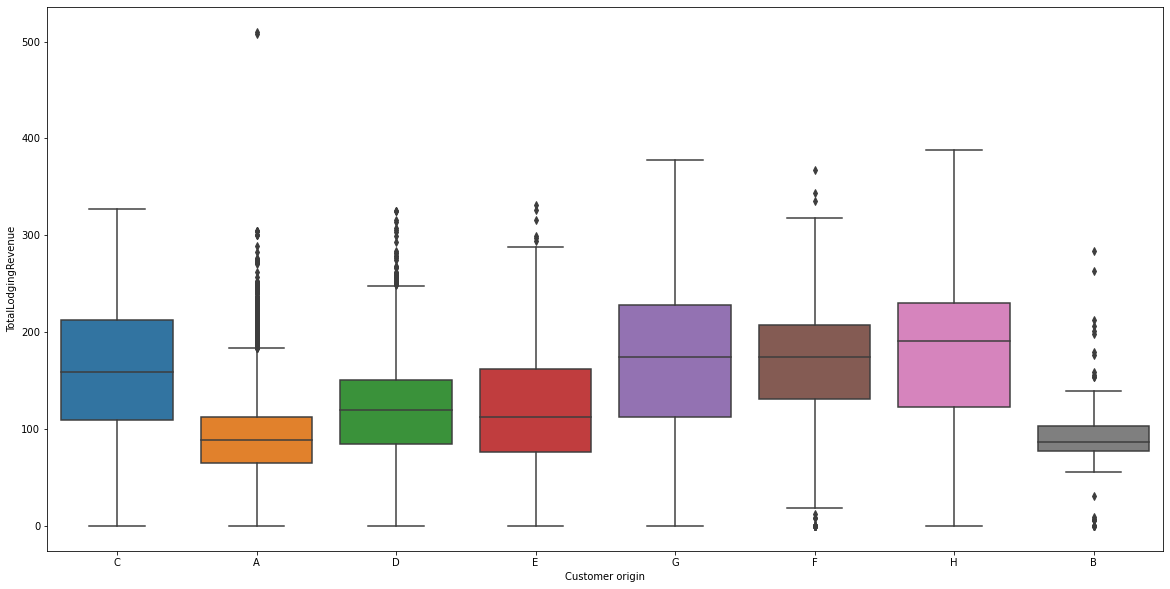

In [109]:
plt.figure(figsize = (20, 10))  

sns.boxplot(df['reserved_room_type'], df['adr'])

plt.ylabel('TotalLodgingRevenue')

plt.xlabel('Customer origin')

plt.show()

**Observations:**
* Type G and H have the higher price in the Average daily rate of the booking.

### **Relationship between Average daily rate of the booking and month of the year across booking origin** 

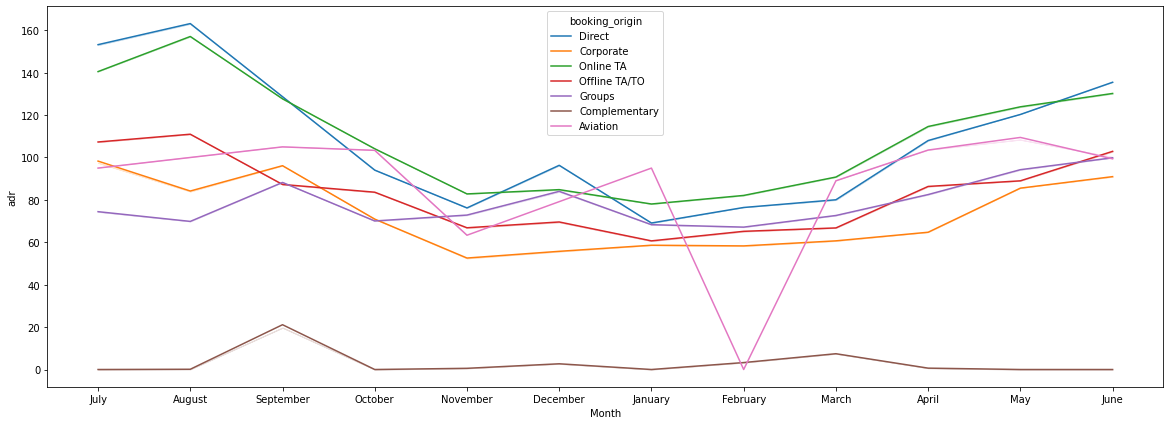

In [113]:
plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_month", y = "adr", ci = 0, data = df, hue = 'booking_origin')

plt.ylabel('adr')

plt.xlabel('Month')

plt.show()

**Observations:**
* Direct and Online TA have the higher price along the year.

### **Relationship between Average daily rate of the booking and years across booking origin** 

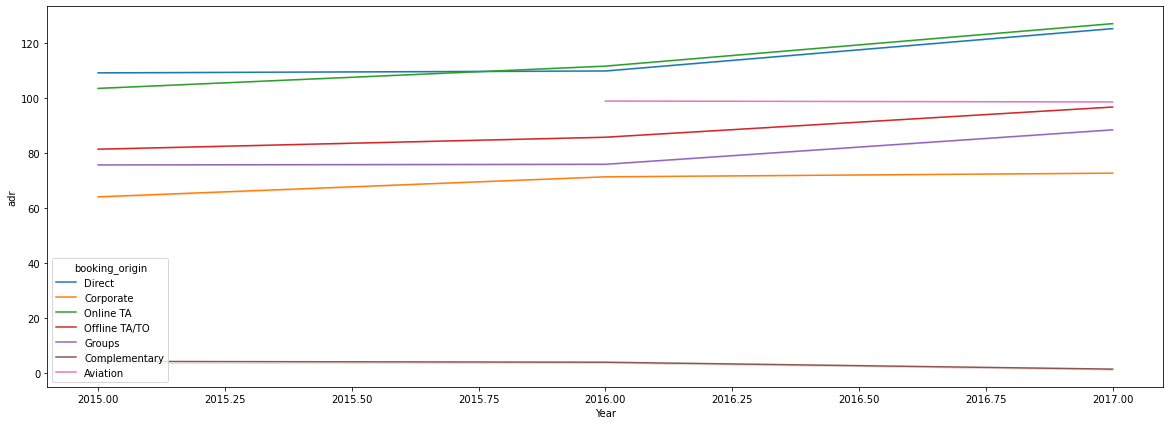

In [114]:
plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_year", y = "adr", ci = 0, data = df, hue = 'booking_origin')

plt.ylabel('adr')

plt.xlabel('Year')

plt.show()

**Observations:**
* Direct and Online TA  also have the higher price along the years.

### **Relationship between Average daily rate of the booking and day of the month across booking origin** 

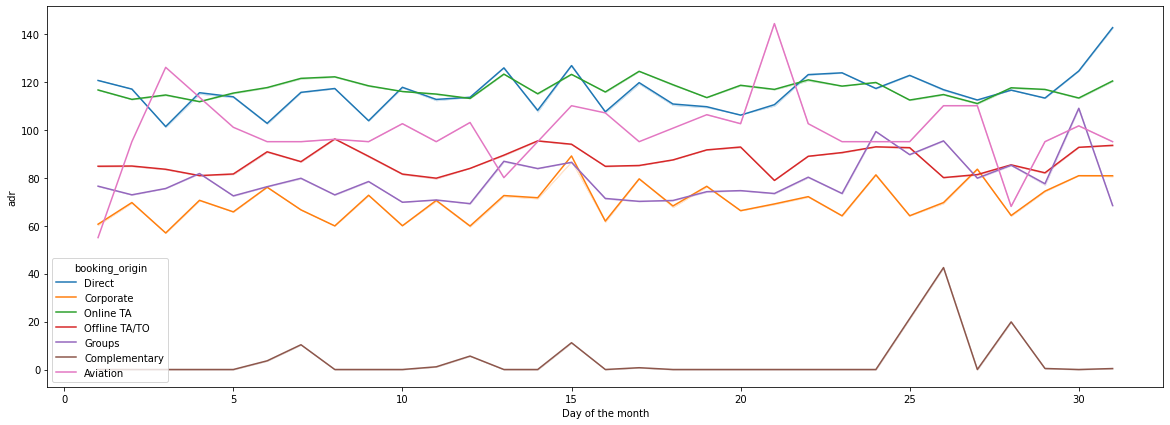

In [115]:
plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_day", y = "adr", ci = 0, data = df, hue = 'booking_origin')

plt.ylabel('adr')

plt.xlabel('Day of the month')

plt.show()

**Observations:**
* Direct and Online TA  also have the higher price along the day of the month.

### Direct reservations Heatmap - Month vs Weekday

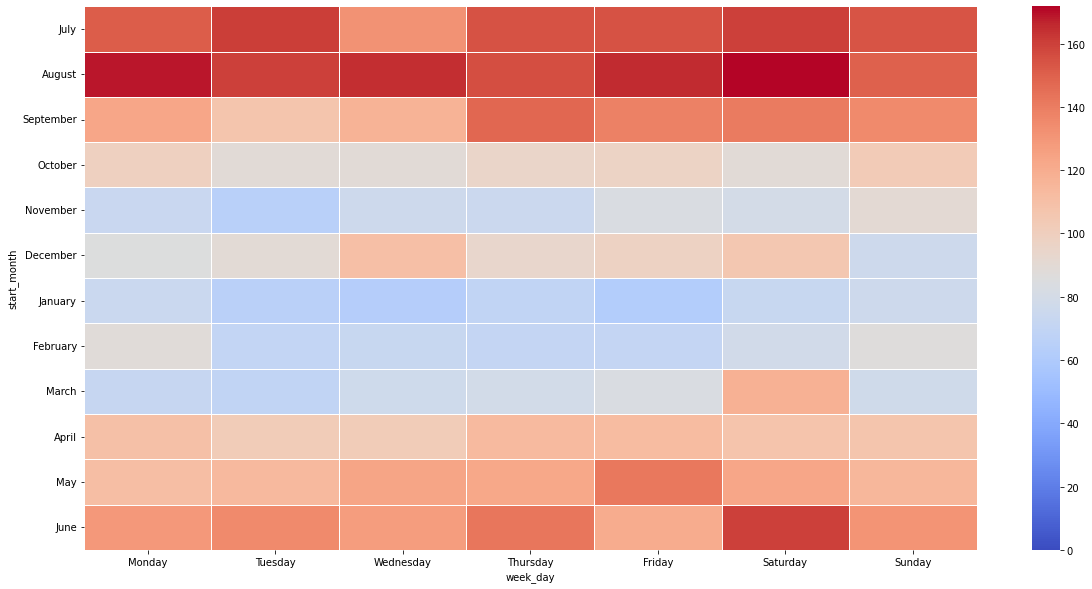

In [116]:
df_man = df[df.booking_origin == 'Direct']

df_hm = df_man.pivot_table(index = 'start_month', columns = 'week_day', values = 'adr')

# Draw a heatmap

plt.figure(figsize = (20, 10)) # To resize the plot

sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)

plt.show()

**Observations:**

* The prices seems to be higher on july an august 

### Online TA reservations Heatmap - Month vs Weekday

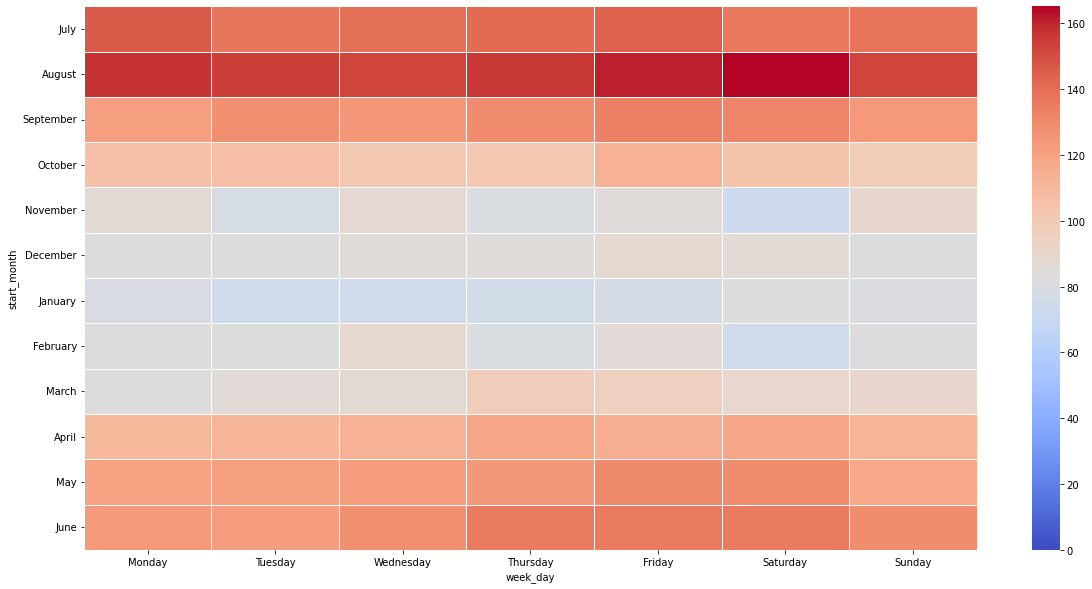

In [117]:
df_man = df[df.booking_origin == 'Online TA']

df_hm = df_man.pivot_table(index = 'start_month', columns = 'week_day', values = 'adr')

# Draw a heatmap

plt.figure(figsize = (20, 10)) # To resize the plot

sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)

plt.show()

**Observations:**

* The prices seems to be higher on july an august 

## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------


We have been able to conclude that: 

1. Spain and USA have the higher prices in the reservation.
2. Online TA and Direct Plataform have the  higher prices in the reservation

--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

1. It would be a good idea to attract the attention of Spanish and US clients.
2. To reach them and achieve a higher booking rate it would be a good idea to use the "Online TA" and "Direct" booking methods.
3. Given that the booking time is usually 3 to 4 months before the visit, it would be a good idea to invest in advertising in the mentioned countries taking into account these period.
